# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

**Q0.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
**A model is called "linear" when it is linear in its parameters. This is when the outcome is predicted by adding up the effects of different variables, each multiplied by a fixed number (called a coefficient). This idea still applies even if the variables are transformed (like squared or logged), as long as the way the coefficients are combined remains straightforward addition.**
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
**The coefficient for a dummy variable tells you how much the outcome changes when switching from a baseline group to the group represented by the dummy variable. The baseline group's effect is built into the starting value of the model (the intercept), so the dummy adjusts for the difference.**
3. Can linear regression be used for classification? Explain why, or why not.
**Linear regression can be used for classification by deciding a cut-off point to divide predictions into categories, like assigning a class based on whether the predicted value is above or below 0.5. However, this method isn’t ideal because linear regression assumes a continuous outcome and might produce predictions outside the range of valid probabilities, like values below 0 or above 1.**
4. What are signs that your linear model is over-fitting?
**A linear model is overfitting if it performs very well on the data it was trained on but poorly on new data. Other signs include coefficients that are much larger than expected or a model that is unnecessarily complicated compared to the size of the dataset. Overfitting usually means the model is capturing random noise instead of true patterns.**
5. Clearly explain multi-colinearity using the two-stage least squares technique.
**Multicollinearity happens when two or more variables in a model are too closely related, making it difficult to figure out how each one individually affects the outcome. This can lead to unstable and hard-to-interpret coefficients. The two-stage least squares method helps address this by finding a substitute for the problematic variables. In the first step, a variable related to the collinear variable but not directly to the outcome, is used to predict the collinear variable. Then, in the second step, the predicted values from the first stage are used in the final model, breaking the problematic correlation and providing more stable estimates.**
6. What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$?
**To include nonlinear relationships in a linear model, one way is to transform the variables, such as using their squared values or logarithms, to capture patterns that are not straight lines. You could also add interaction terms, which combine two variables to show how they work together to influence the outcome.**
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?
**The intercept represents the predicted value of the outcome when all the other variables in the model are zero. A slope coefficient for a variable shows how much the outcome is expected to change for each one-unit increase in that variable, assuming all other variables stay the same. The coefficient for a dummy variable shows how much the outcome differs between the group represented by the dummy and the baseline group, with the baseline's effect included in the intercept.**

In [3]:
! git clone https://github.com/annekuma/linearRegression

Cloning into 'linearRegression'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 66 (delta 20), reused 11 (delta 11), pack-reused 37 (from 1)
Receiving objects: 100% (66/66), 2.64 MiB | 18.53 MiB/s, done.
Resolving deltas: 100% (22/22), done.


**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

                    Price  Review Scores Rating
Neighbourhood                                  
Bronx           75.276498             91.654378
Brooklyn       127.747378             92.363497
Manhattan      183.664286             91.801496
Queens          96.857233             91.549057
Staten Island  146.166667             90.843750
The most expensive borough on average is: Manhattan


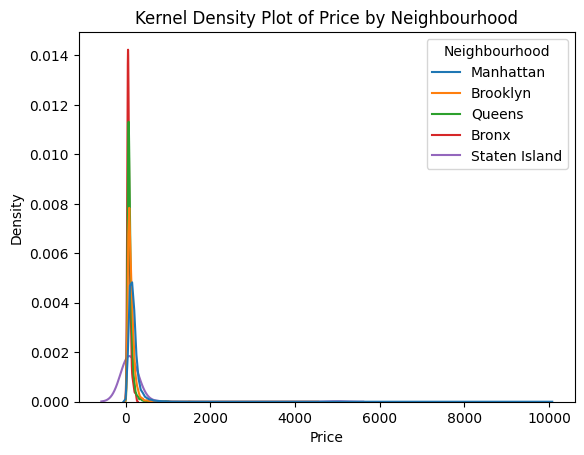

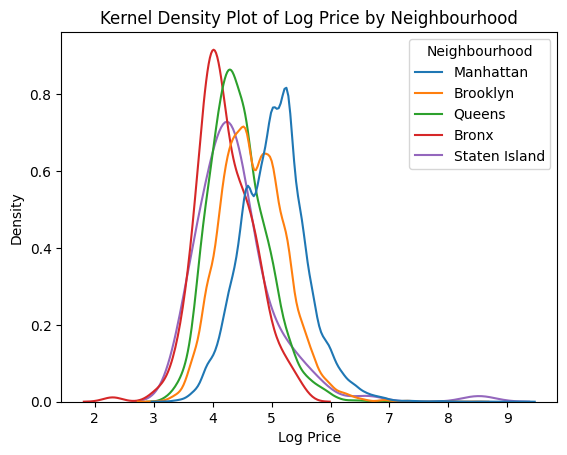

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#1
df = pd.read_csv('/content/linearRegression/data/Q1_clean.csv')
df.rename(columns={'Neighbourhood ': 'Neighbourhood'}, inplace=True)

average_stats = df.groupby('Neighbourhood')[['Price', 'Review Scores Rating']].mean()
print(average_stats)
most_expensive = average_stats['Price'].idxmax()
print(f"The most expensive borough on average is: {most_expensive}")

sns.kdeplot(data=df, x='Price', hue='Neighbourhood', common_norm=False)
plt.title('Kernel Density Plot of Price by Neighbourhood')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

sns.kdeplot(data=df, x=np.log(df['Price']), hue='Neighbourhood', common_norm=False)
plt.title('Kernel Density Plot of Log Price by Neighbourhood')
plt.xlabel('Log Price')
plt.ylabel('Density')
plt.show()

In [5]:
#2
from sklearn.linear_model import LinearRegression

y = df['Price']
X = pd.get_dummies(df['Neighbourhood'], dtype=int)

reg = LinearRegression(fit_intercept=False)
reg.fit(X, y)

results = pd.DataFrame({'Neighbourhood': X.columns, 'Coefficient': reg.coef_})
print(results)

   Neighbourhood  Coefficient
0          Bronx    75.276498
1       Brooklyn   127.747378
2      Manhattan   183.664286
3         Queens    96.857233
4  Staten Island   146.166667


#2
The coefficients in this regression represent the average price for each neighborhood. This is because the model includes only the dummy variables for neighborhoods and excludes an intercept. Each coefficient shows the predicted price for listings in that neighborhood, calculated without comparing them to a baseline. These coefficients are identical to the average prices calculated in the first step since the regression has no other control variables influencing the prediction. When running a regression of a continuous variable on a single categorical variable, the coefficients for the dummy variables indicate the group means for each category. Without other variables in the model, these values are equivalent to simply calculating the averages for each group in the data.








In [6]:
#3
y = df['Price']
X = pd.get_dummies(df['Neighbourhood'], dtype=int, drop_first=True)

reg = LinearRegression().fit(X, y)

results = pd.DataFrame({'Variable': ['Intercept'] + list(X.columns),
                        'Coefficient': [reg.intercept_] + list(reg.coef_)})
print(results)

        Variable  Coefficient
0      Intercept    75.276498
1       Brooklyn    52.470881
2      Manhattan   108.387789
3         Queens    21.580735
4  Staten Island    70.890169


#3
When including an intercept in the regression model, we drop one of the neighborhood categories (in this case, "The Bronx") to avoid multicollinearity. This dropped category becomes the reference group, and its average price is represented by the intercept. The coefficients for the remaining neighborhoods show how their average prices differ from the baseline (The Bronx). To get the coefficients from part 2 (the regression without an intercept), you can add the intercept to each coefficient for the corresponding neighborhood. This will give you the group averages from part 1, effectively turning the regression with an intercept into the one from part 2.

In [22]:
#4
from sklearn.model_selection import train_test_split
from sklearn import linear_model

y = df['Price']
X = df[['Review Scores Rating', 'Neighbourhood', 'Room Type']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

train_features = pd.concat([
    X_train['Review Scores Rating'],
    pd.get_dummies(X_train['Neighbourhood'], prefix='Neighbourhood', dtype=int),
    pd.get_dummies(X_train['Room Type'], prefix='Room_Type', dtype=int)
], axis=1)

test_features = pd.concat([
    X_test['Review Scores Rating'],
    pd.get_dummies(X_test['Neighbourhood'], prefix='Neighbourhood', dtype=int),
    pd.get_dummies(X_test['Room Type'], prefix='Room_Type', dtype=int)
], axis=1)

model = LinearRegression(fit_intercept=False).fit(train_features, y_train)
y_pred = model.predict(test_features)
r_squared = model.score(test_features, y_test)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))

coefficients = pd.DataFrame({
    'Variable': train_features.columns,
    'Coefficient': model.coef_
})

highest_price = (coefficients.loc[coefficients['Variable'] == 'Review Scores Rating', 'Coefficient'].values[0] * 100 +
                 coefficients.loc[coefficients['Variable'].str.contains('Neighbourhood_Manhattan'), 'Coefficient'].sum() +
                 coefficients.loc[coefficients['Variable'].str.contains('Room_Type_'), 'Coefficient'].max())

print(coefficients)
print(f"R-squared on the test set: {r_squared:.4f}")
print(f"RMSE on the test set: {rmse:.2f}")
print(f"Coefficient for Review Scores Rating: {coefficients.loc[coefficients['Variable'] == 'Review Scores Rating', 'Coefficient'].values[0]:.4f}")
print(f"The most expensive property you can rent is a 100-rated place in Manhattan, priced at approximately {highest_price:.2f} per night.")


                      Variable  Coefficient
0         Review Scores Rating     0.783476
1          Neighbourhood_Bronx   -10.369403
2       Neighbourhood_Brooklyn    12.822432
3      Neighbourhood_Manhattan    54.850567
4         Neighbourhood_Queens    -6.741760
5  Neighbourhood_Staten Island    -2.661995
6    Room_Type_Entire home/apt    94.089254
7       Room_Type_Private room   -12.149948
8        Room_Type_Shared room   -34.039466
R-squared on the test set: 0.1824
RMSE on the test set: 130.45
Coefficient for Review Scores Rating: 0.7835
The most expensive property you can rent is a 100-rated place in Manhattan, priced at approximately 227.29 per night.


In [23]:
#5
y = df['Price']
X = df[['Review Scores Rating', 'Neighbourhood', 'Room Type']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100)

train_features = pd.concat([
    X_train['Review Scores Rating'],
    pd.get_dummies(X_train['Neighbourhood'], prefix='Neighbourhood', dtype=int),
    pd.get_dummies(X_train['Room Type'], prefix='Room_Type', dtype=int)
], axis=1)

test_features = pd.concat([
    X_test['Review Scores Rating'],
    pd.get_dummies(X_test['Neighbourhood'], prefix='Neighbourhood', dtype=int),
    pd.get_dummies(X_test['Room Type'], prefix='Room_Type', dtype=int)
], axis=1)

model = LinearRegression(fit_intercept=False).fit(train_features, y_train)
y_pred = model.predict(test_features)
r_squared = model.score(test_features, y_test)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))

coefficients = pd.DataFrame({
    'Variable': train_features.columns,
    'Coefficient': model.coef_
})

highest_price = (coefficients.loc[coefficients['Variable'] == 'Review Scores Rating', 'Coefficient'].values[0] * 100 +
                 coefficients.loc[coefficients['Variable'].str.contains('Neighbourhood_Manhattan'), 'Coefficient'].sum() +
                 coefficients.loc[coefficients['Variable'].str.contains('Room_Type_Entire home/apt'), 'Coefficient'].values[0])

print(coefficients)
print(f"R-squared on the test set: {r_squared:.4f}")
print(f"RMSE on the test set: {rmse:.2f}")
print(f"Coefficient for Review Scores Rating: {coefficients.loc[coefficients['Variable'] == 'Review Scores Rating', 'Coefficient'].values[0]:.4f}")
print(f"A 100-rated Entire home/apt in Manhattan would cost approximately {highest_price:.2f} per night.")


                      Variable  Coefficient
0         Review Scores Rating     0.626912
1          Neighbourhood_Bronx   -13.022765
2       Neighbourhood_Brooklyn    10.378456
3      Neighbourhood_Manhattan    53.693304
4         Neighbourhood_Queens    -6.833330
5  Neighbourhood_Staten Island    50.003022
6    Room_Type_Entire home/apt   110.617820
7       Room_Type_Private room     3.101341
8        Room_Type_Shared room   -19.500474
R-squared on the test set: 0.2204
RMSE on the test set: 114.28
Coefficient for Review Scores Rating: 0.6269
A 100-rated Entire home/apt in Manhattan would cost approximately 227.00 per night.


#6
The coefficient on Review Scores Rating tells us how much the price changes, on average, for each one-point increase in the rating, while keeping other factors constant. If it changes between part 4 and part 5, it's because the regression model in part 5 now also accounts for Room Type, which can explain part of the variation in prices. In multiple regression, adding more variables can change the coefficients because the model adjusts to separate the effects of each factor, so the impact of Review Scores Rating might appear smaller or larger depending on how much of the price differences were actually due to Room Type.

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q3.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q4.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{alignat*}{3}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{alignat*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{alignat*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

which can be written in terms of sample covariance and sample variance as:

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{alignat*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)

**Q5.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?